In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_absolute_error, mean_squared_error
from datetime import datetime
import warnings
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score


warnings.filterwarnings("ignore")
sns.set_theme(style="darkgrid")

# Teams

In [2]:
home= "Union Berlin"
away= "Holstein Kiel"

In [3]:
df_home= pd.read_csv(f"../Data/{home}.csv")
df_home["Date"] = pd.to_datetime(df_home["Date"]) 
df_home.tail()

,Team,Opp,Date,Result,H/A,GF,GA,GD,Poss,PKatt,...,xAG,xA,G-xG,np:G-xG,A-xAG,npxG/Sh,FKAtt,PSxG,PSxG/SoT,PSxG+/-
18,Union Berlin,St. Pauli,2025-01-26,L,A,0,3,-3,56,0,...,1.0,0.8,-1.1,-1.1,-1.0,0.08,1,1.6,0.32,-1.4
19,Union Berlin,RB Leipzig,2025-02-01,D,H,0,0,0,47,0,...,0.8,0.7,-1.3,-1.3,-0.8,0.06,0,0.2,0.08,0.2
20,Union Berlin,Hoffenheim,2025-02-08,W,A,4,0,4,36,0,...,2.6,1.9,1.2,1.2,0.4,0.13,0,0.5,0.12,0.5
21,Union Berlin,Gladbach,2025-02-15,L,H,1,2,-1,52,1,...,1.1,2.0,-1.0,-1.2,-1.1,0.07,0,2.4,0.49,0.4
22,Union Berlin,Dortmund,2025-02-22,L,A,0,6,-6,36,0,...,0.2,1.3,-0.3,-0.3,-0.2,0.04,0,5.1,0.63,0.1


In [4]:
df_vs_home= pd.read_csv(f"../Data/vs {home}.csv")
df_vs_home["Date"] = pd.to_datetime(df_vs_home["Date"]) 
df_vs_home.tail()

,Team,Opp,Date,Result,H/A,GF,GA,GD,Poss,PKatt,...,xAG,xA,G-xG,np:G-xG,A-xAG,npxG/Sh,FKAtt,PSxG,PSxG/SoT,PSxG+/-
18,St. Pauli,Union Berlin,2025-01-26,W,H,3,0,3,44,0,...,1.0,0.9,1.8,1.8,2.0,0.08,0,0.4,0.22,0.4
19,RB Leipzig,Union Berlin,2025-02-01,D,A,0,0,0,53,0,...,0.2,0.5,-0.3,-0.3,-0.2,0.05,0,0.5,0.10,0.5
20,Hoffenheim,Union Berlin,2025-02-08,L,H,0,4,-4,64,0,...,0.9,0.7,-1.1,-1.1,-0.9,0.07,1,2.2,0.36,-1.8
21,Gladbach,Union Berlin,2025-02-15,W,A,2,1,1,48,0,...,2.0,1.4,-0.1,-0.1,0.0,0.23,0,1.8,0.30,0.8
22,Dortmund,Union Berlin,2025-02-22,W,H,6,0,6,64,0,...,4.3,3.8,0.2,0.2,0.7,0.20,0,0.1,0.13,0.1


In [5]:
df_away= pd.read_csv(f"../Data/{away}.csv")
df_away["Date"] = pd.to_datetime(df_away["Date"]) 
df_away.tail()

,Team,Opp,Date,Result,H/A,GF,GA,GD,Poss,PKatt,...,xAG,xA,G-xG,np:G-xG,A-xAG,npxG/Sh,FKAtt,PSxG,PSxG/SoT,PSxG+/-
18,Holstein Kiel,Wolfsburg,2025-01-24,D,A,2,2,0,31,0,...,0.2,0.2,1.8,1.8,1.8,0.04,0,1.2,0.27,-0.8
19,Holstein Kiel,Bayern Munich,2025-02-01,L,A,3,4,-1,29,0,...,1.7,1.0,1.2,1.2,0.3,0.19,0,5.5,0.50,1.5
20,Holstein Kiel,Bochum,2025-02-09,D,H,2,2,0,48,1,...,1.1,0.9,0.1,-0.1,-0.1,0.12,1,1.4,0.34,-0.6
21,Holstein Kiel,Eint Frankfurt,2025-02-16,L,A,1,3,-2,49,0,...,0.6,0.8,-0.4,-0.4,-0.6,0.21,1,3.5,0.32,0.5
22,Holstein Kiel,Leverkusen,2025-02-22,L,H,0,2,-2,38,0,...,0.3,0.4,-0.3,-0.3,-0.3,0.08,0,3.2,0.45,1.2


In [6]:
df_vs_away= pd.read_csv(f"../Data/vs {away}.csv")
df_vs_away["Date"] = pd.to_datetime(df_away["Date"]) 
df_vs_away.tail()

,Team,Opp,Date,Result,H/A,GF,GA,GD,Poss,PKatt,...,xAG,xA,G-xG,np:G-xG,A-xAG,npxG/Sh,FKAtt,PSxG,PSxG/SoT,PSxG+/-
18,Wolfsburg,Holstein Kiel,2025-01-24,D,H,2,2,0,69,0,...,1.6,2.7,0.0,0.0,0.4,0.09,0,1.1,0.55,-0.9
19,Bayern Munich,Holstein Kiel,2025-02-01,W,H,4,3,1,71,0,...,2.8,3.8,0.6,0.6,0.2,0.12,1,2.3,0.59,-0.7
20,Bochum,Holstein Kiel,2025-02-09,D,A,2,2,0,52,0,...,2.2,2.5,-0.3,-0.3,-0.2,0.12,0,2.0,0.40,0.0
21,Eint Frankfurt,Holstein Kiel,2025-02-16,W,H,3,1,2,51,1,...,0.9,0.8,0.5,1.3,0.1,0.09,1,1.1,0.54,0.1
22,Leverkusen,Holstein Kiel,2025-02-22,W,A,2,0,2,62,0,...,1.3,1.7,0.2,0.2,-0.3,0.10,1,0.7,0.23,0.7


In [7]:
print(list(df_away.columns))

['Team', 'Opp', 'Date', 'Result', 'H/A', 'GF', 'GA', 'GD', 'Poss', 'PKatt', 'G-PK', 'PK', 'PKm', 'Att (GK)', 'Thr', 'Pa Launch%', 'Pa AvgLen', 'Won', 'Lost', 'Won%', 'Att To', 'Succ', 'Succ%', 'Tkld', 'Tkld%', 'Carries', 'TotDist', 'PrgDist', 'PrgC', 'Last3rd Car', 'OppCr', 'Stp', 'Stp%', 'CrdY', 'CrdR', '2CrdY', 'Fls', 'Fld', 'GCA', 'PassLive Gc', 'PassDead Gc', 'TO Gc', 'Sh-Gc', 'Fld Gc', 'Def-Gc', 'GK Att', 'Launch%', 'AvgLen', 'Sh', 'G/Sh', 'G/SoT', 'SoT', 'SoT%', 'Dist', 'FK', 'Off', 'PKwon', 'PKcon', 'OG', 'Recov', '#OPA', 'AvgDist', 'Cmp', 'Pas Att', 'Cmp%', 'KP', 'Last3rd PA', 'PPA', 'CrsPA', 'PrgP', 'TotDist Pas', 'PrgDist Pas', 'Cmp 5-15', 'Att 5-15', 'Cmp% 5-15', 'Cmp 15-30', 'Att 15-30', 'Cmp% 15-30', 'Cmp 30+', 'Att 30+', 'Cmp% 30+', 'PKdef', 'PKA', 'PKms', 'Missed PK%', 'PKAg', 'PKsv', 'PK Save%', 'FK Ag', 'CKG', 'OGK', 'Live Pas', 'Dead', 'Pas FK', 'TB', 'Sw', 'Crs', 'TI', 'CK', 'In', 'Out', 'Str', 'Ps Off', 'PTo', 'Rec', 'Last3rd Rec', 'CPA', 'Mis', 'Dis', 'SCA', 'PassL

# Desc

# Features

## Offense

In [8]:
offense= ['G-PK', 'PK', 'PKm', 'Poss', 'PKatt', 'Att To', 'Succ', 'Succ%', 'Tkld', 'Tkld%', 'Carries', 'TotDist', 'PrgDist', 
          'PrgC', 'Last3rd Car', 'GCA', 'PassLive Gc', 'PassDead Gc', 'TO Gc', 'Sh-Gc', 'Fld Gc', 'Def-Gc', 'Sh', 'G/Sh', 
          'G/SoT', 'SoT', 'SoT%', 'Dist', 'FK', 'Off', 'PKwon', 'Cmp', 'Pas Att', 'Cmp%', 'KP', 'Last3rd PA', 'PPA', 'CrsPA', 
          'PrgP', 'TotDist Pas', 'PrgDist Pas', 'Cmp 5-15', 'Att 5-15', 'Cmp% 5-15', 'Cmp 15-30', 'Att 15-30', 'Cmp% 15-30', 
          'Cmp 30+', 'Att 30+', 'Cmp% 30+', 'Live Pas', 'Dead', 'Pas FK', 'TB', 'Sw', 'Crs', 'TI', 'CK', 'In', 'Out', 'Str', 
          'Ps Off', 'PTo', 'Rec', 'Last3rd Rec', 'CPA', 'Mis', 'Dis', 'SCA', 'PassLive Sc', 'PassDead Sc', 'TO Sc', 'Sh-Sh', 
          'Fld Sc', 'Def-Sc', 'Touches', 'Def Pen', 'Tch Def 3rd', 'Tch Mid 3rd', 'Tch Att 3rd', 'Att Pen', 'Live Tch', 'xG', 
          'npxG', 'xGD', 'npxGD', 'xAG', 'xA', 'G-xG', 'np:G-xG', 'A-xAG', 'npxG/Sh', 'FKAtt', 'GF']

In [9]:
df_home_off= df_home[offense]
df_home_off.tail()

,G-PK,PK,PKm,Poss,PKatt,Att To,Succ,Succ%,Tkld,Tkld%,...,xGD,npxGD,xAG,xA,G-xG,np:G-xG,A-xAG,npxG/Sh,FKAtt,GF
18,0,0,0,56,0,9,6,66.7,3,33.3,...,-0.1,-0.1,1.0,0.8,-1.1,-1.1,-1.0,0.08,1,0
19,0,0,0,47,0,14,4,28.6,9,64.3,...,1.0,1.0,0.8,0.7,-1.3,-1.3,-0.8,0.06,0,0
20,4,0,0,36,0,9,4,44.4,4,44.4,...,1.8,1.8,2.6,1.9,1.2,1.2,0.4,0.13,0,4
21,0,1,0,52,1,15,7,46.7,7,46.7,...,-0.1,-0.9,1.1,2.0,-1.0,-1.2,-1.1,0.07,0,1
22,0,0,0,36,0,13,1,7.7,10,76.9,...,-4.5,-4.5,0.2,1.3,-0.3,-0.3,-0.2,0.04,0,0


In [10]:
df_vs_home_off= df_vs_home[offense]
df_vs_home_off.tail()

,G-PK,PK,PKm,Poss,PKatt,Att To,Succ,Succ%,Tkld,Tkld%,...,xGD,npxGD,xAG,xA,G-xG,np:G-xG,A-xAG,npxG/Sh,FKAtt,GF
18,3,0,0,44,0,6,1,16.7,4,66.7,...,0.1,0.1,1.0,0.9,1.8,1.8,2.0,0.08,0,3
19,0,0,0,53,0,12,6,50.0,5,41.7,...,-1.0,-1.0,0.2,0.5,-0.3,-0.3,-0.2,0.05,0,0
20,0,0,0,64,0,21,6,28.6,13,61.9,...,-1.8,-1.8,0.9,0.7,-1.1,-1.1,-0.9,0.07,1,0
21,2,0,0,48,0,12,8,66.7,4,33.3,...,0.1,0.9,2.0,1.4,-0.1,-0.1,0.0,0.23,0,2
22,5,0,0,64,0,20,11,55.0,8,40.0,...,4.5,4.5,4.3,3.8,0.2,0.2,0.7,0.20,0,6


In [11]:
df_away_off= df_away[offense]
df_away_off.tail()

,G-PK,PK,PKm,Poss,PKatt,Att To,Succ,Succ%,Tkld,Tkld%,...,xGD,npxGD,xAG,xA,G-xG,np:G-xG,A-xAG,npxG/Sh,FKAtt,GF
18,2,0,0,31,0,2,1,50.0,1,50.0,...,-1.7,-1.7,0.2,0.2,1.8,1.8,1.8,0.04,0,2
19,3,0,0,29,0,7,2,28.6,5,71.4,...,-1.6,-1.6,1.7,1.0,1.2,1.2,0.3,0.19,0,3
20,1,1,0,48,1,17,9,52.9,6,35.3,...,-0.4,-1.2,1.1,0.9,0.1,-0.1,-0.1,0.12,1,2
21,1,0,0,49,0,15,4,26.7,7,46.7,...,-1.0,-0.3,0.6,0.8,-0.4,-0.4,-0.6,0.21,1,1
22,0,0,0,38,0,10,8,80.0,2,20.0,...,-1.5,-1.5,0.3,0.4,-0.3,-0.3,-0.3,0.08,0,0


In [12]:
df_vs_away_off= df_vs_away[offense]
df_vs_away_off.tail()

,G-PK,PK,PKm,Poss,PKatt,Att To,Succ,Succ%,Tkld,Tkld%,...,xGD,npxGD,xAG,xA,G-xG,np:G-xG,A-xAG,npxG/Sh,FKAtt,GF
18,2,0,0,69,0,18,7,38.9,11,61.1,...,1.7,1.7,1.6,2.7,0.0,0.0,0.4,0.09,0,2
19,4,0,0,71,0,19,12,63.2,5,26.3,...,1.6,1.6,2.8,3.8,0.6,0.6,0.2,0.12,1,4
20,2,0,0,52,0,14,4,28.6,10,71.4,...,0.4,1.2,2.2,2.5,-0.3,-0.3,-0.2,0.12,0,2
21,3,0,1,51,1,12,8,66.7,2,16.7,...,1.0,0.3,0.9,0.8,0.5,1.3,0.1,0.09,1,3
22,2,0,0,62,0,11,4,36.4,5,45.5,...,1.5,1.5,1.3,1.7,0.2,0.2,-0.3,0.10,1,2


## Defence

In [13]:
defence= ['OppCr', 'Stp', 'Stp%', 'PKcon', '#OPA', 'AvgDist', 'PKsv', 'PK Save%', 'FK Ag', 'CKG', 'OGK', 'SoTA', 'Saves', 
          'Save%', 'Tkl', 'TklW', 'Tkl Def 3rd', 'Tkl Mid 3rd', 'Tkl Att 3rd', 'Tkl.2', 'Tkl Att', 'Tkl%', 'Lost Tkl', 
          'Ints', 'BlcSh', 'Pass', 'Int', 'Tkl+Int', 'Clr', 'Err',  'PSxG', 'PSxG/SoT', 'PSxG+/-', 'GA']

In [14]:
df_home_def= df_home[defence]
df_home_def.tail()

,OppCr,Stp,Stp%,PKcon,#OPA,AvgDist,PKsv,PK Save%,FK Ag,CKG,...,BlcSh,Pass,Int,Tkl+Int,Clr,Err,PSxG,PSxG/SoT,PSxG+/-,GA
18,13,0,0.0,0,0,13.0,0,NaN,0,0,...,7,11,2,14,21,1,1.6,0.32,-1.4,3
19,17,0,0.0,0,0,3.0,0,NaN,0,0,...,2,9,8,26,38,0,0.2,0.08,0.2,0
20,28,2,7.1,0,0,9.3,0,NaN,0,0,...,6,9,11,30,45,0,0.5,0.12,0.5,0
21,11,1,9.1,0,4,20.6,0,NaN,0,0,...,1,10,10,20,24,0,2.4,0.49,0.4,2
22,19,1,5.3,0,1,9.6,0,NaN,0,0,...,4,12,10,26,37,2,5.1,0.63,0.1,6


In [15]:
df_vs_home_def= df_vs_home[defence]
df_vs_home_def.tail()

,OppCr,Stp,Stp%,PKcon,#OPA,AvgDist,PKsv,PK Save%,FK Ag,CKG,...,BlcSh,Pass,Int,Tkl+Int,Clr,Err,PSxG,PSxG/SoT,PSxG+/-,GA
18,14,1,7.1,0,0,8.5,0,NaN,0,0,...,3,14,8,19,32,1,0.4,0.22,0.4,0
19,24,1,4.2,0,1,11.8,0,NaN,0,0,...,9,10,7,30,66,1,0.5,0.10,0.5,0
20,7,1,14.3,0,0,6.0,0,NaN,0,0,...,6,10,7,19,29,3,2.2,0.36,-1.8,4
21,21,0,0.0,1,1,24.0,0,0.0,0,0,...,6,10,10,25,44,0,1.8,0.30,0.8,1
22,11,1,9.1,0,1,9.5,0,NaN,0,0,...,2,5,10,25,16,0,0.1,0.13,0.1,0


In [16]:
df_away_def= df_away[defence]
df_away_def.head()

,OppCr,Stp,Stp%,PKcon,#OPA,AvgDist,PKsv,PK Save%,FK Ag,CKG,...,BlcSh,Pass,Int,Tkl+Int,Clr,Err,PSxG,PSxG/SoT,PSxG+/-,GA
0,17,2,11.8,1,0,6.0,0,0.0,0,0,...,5,12,7,22,30,0,3.8,0.37,0.8,3
1,20,3,15.0,0,0,4.5,0,NaN,1,0,...,5,2,11,30,32,0,1.2,0.30,-0.8,2
2,14,1,7.1,1,1,11.0,0,0.0,0,0,...,5,3,10,34,23,2,4.4,0.32,-0.6,6
3,15,2,13.3,0,0,7.1,0,NaN,0,0,...,4,3,16,27,19,0,1.4,0.46,-0.6,2
4,23,0,0.0,0,0,15.7,0,NaN,0,2,...,7,9,3,18,29,1,1.8,0.18,-2.2,4


In [17]:
df_vs_away_def= df_vs_away[defence]
df_vs_away_def.head()

,OppCr,Stp,Stp%,PKcon,#OPA,AvgDist,PKsv,PK Save%,FK Ag,CKG,...,BlcSh,Pass,Int,Tkl+Int,Clr,Err,PSxG,PSxG/SoT,PSxG+/-,GA
0,19,0,0.0,0,2,12.7,0,NaN,0,0,...,4,7,5,21,38,0,1.8,0.40,-0.2,2
1,6,0,0.0,0,0,NaN,0,NaN,0,0,...,2,4,5,21,16,0,1.2,0.25,1.2,0
2,11,0,0.0,0,2,23.3,0,NaN,0,0,...,1,5,8,17,13,0,0.1,0.09,-0.9,1
3,20,0,0.0,0,3,16.4,0,NaN,0,0,...,2,10,14,22,27,0,1.9,0.48,-0.1,2
4,21,2,9.5,1,5,17.3,0,0.0,0,1,...,3,9,5,14,26,0,1.2,0.06,-0.8,2


## Combined

In [18]:
combined= ['Won', 'Lost', 'Won%', 'CrdY', 'CrdR', '2CrdY', 'Fls', 'Fld', 'Recov']

In [19]:
df_home_cmb= df_home[combined]
df_home_cmb.tail()

,Won,Lost,Won%,CrdY,CrdR,2CrdY,Fls,Fld,Recov
18,21,18,53.8,3,0,0,15,6,38
19,17,23,42.5,3,0,0,5,9,47
20,27,21,56.3,1,0,0,16,9,51
21,18,20,47.4,0,0,0,9,8,39
22,14,21,40.0,2,0,0,11,9,35


In [20]:
df_vs_home_cmb= df_vs_home[combined]
df_vs_home_cmb.tail()

,Won,Lost,Won%,CrdY,CrdR,2CrdY,Fls,Fld,Recov
18,18,21,46.2,0,0,0,6,15,39
19,23,17,57.5,2,0,0,12,5,48
20,21,27,43.8,2,0,0,9,15,43
21,20,18,52.6,1,0,0,8,9,34
22,21,14,60.0,2,0,0,10,10,49


In [21]:
df_away_cmb= df_away[combined]
df_away_cmb.tail()

,Won,Lost,Won%,CrdY,CrdR,2CrdY,Fls,Fld,Recov
18,17,10,63.0,4,0,0,10,8,31
19,10,11,47.6,1,0,0,10,6,35
20,21,34,38.2,2,0,0,11,14,39
21,10,7,58.8,0,0,0,10,16,41
22,15,23,39.5,4,0,0,11,10,38


In [22]:
df_vs_away_cmb= df_vs_away[combined]
df_vs_away_cmb.tail()

,Won,Lost,Won%,CrdY,CrdR,2CrdY,Fls,Fld,Recov
18,10,17,37.0,2,0,0,9,9,53
19,11,10,52.4,1,0,0,7,9,52
20,34,21,61.8,2,0,0,16,11,50
21,7,10,41.2,2,0,0,16,8,42
22,23,15,60.5,1,0,0,10,11,53


## By Team

In [23]:
def create_lagged_features(df, target_cols, window= 4):
    """
    Creates lagged and rolling window features for a given dataset.
    
    Parameters:
    df (pd.DataFrame): The input dataframe containing game-by-game data.
    team_col (str): The column name representing the team.
    date_col (str): The column name representing the game date.
    target_cols (list): List of columns to create lagged and rolling features for.
    opponent_col (str, optional): Column representing the opponent team (if applicable).
    lags (list): List of lag periods to include.
    rolling_windows (list): List of rolling window sizes for moving averages and std dev.
    
    Returns:
    pd.DataFrame: Dataframe with additional lagged and rolling features.
    """
    df = df.copy()
    
    
    # Create lagged features for the given columns
    #for col in target_cols:
     #   for lag in range(1, window+1):
      #      df[f'{col}_lag_{lag}'] = df[col].shift(lag)
    
    # Create rolling window features (mean & std)
    for col in target_cols:
        df[f'{col}_rolling_avg_{window}'] = df[col].shift(1).rolling(window, min_periods= 1).mean()
        df[f'{col}_rolling_std_{window}'] = df[col].shift(1).rolling(window, min_periods= 1).std()
    
    # Fill NA values (after shifting to avoid data leakage)
    df = df.fillna(0)
    
    return df


In [24]:
df_home_off= create_lagged_features(df_home_off, offense)
df_home_off.tail()

,G-PK,PK,PKm,Poss,PKatt,Att To,Succ,Succ%,Tkld,Tkld%,...,np:G-xG_rolling_avg_4,np:G-xG_rolling_std_4,A-xAG_rolling_avg_4,A-xAG_rolling_std_4,npxG/Sh_rolling_avg_4,npxG/Sh_rolling_std_4,FKAtt_rolling_avg_4,FKAtt_rolling_std_4,GF_rolling_avg_4,GF_rolling_std_4
18,0,0,0,56,0,9,6,66.7,3,33.3,...,-0.625,0.394757,-0.425,0.359398,0.0975,0.033040,0.25,0.50000,0.75,0.957427
19,0,0,0,47,0,14,4,28.6,9,64.3,...,-0.825,0.377492,-0.700,0.216025,0.0975,0.033040,0.50,0.57735,0.50,1.000000
20,4,0,0,36,0,9,4,44.4,4,44.4,...,-0.875,0.434933,-0.725,0.221736,0.0825,0.033040,0.50,0.57735,0.50,1.000000
21,0,1,0,52,1,15,7,46.7,7,46.7,...,-0.375,1.135415,-0.475,0.618466,0.1000,0.035590,0.50,0.57735,1.50,1.914854
22,0,0,0,36,0,13,1,7.7,10,76.9,...,-0.600,1.202775,-0.625,0.694622,0.0850,0.031091,0.25,0.50000,1.25,1.892969


In [25]:
df_vs_home_off= create_lagged_features(df_vs_home_off, offense)
df_vs_home_off.tail()

,G-PK,PK,PKm,Poss,PKatt,Att To,Succ,Succ%,Tkld,Tkld%,...,np:G-xG_rolling_avg_4,np:G-xG_rolling_std_4,A-xAG_rolling_avg_4,A-xAG_rolling_std_4,npxG/Sh_rolling_avg_4,npxG/Sh_rolling_std_4,FKAtt_rolling_avg_4,FKAtt_rolling_std_4,GF_rolling_avg_4,GF_rolling_std_4
18,3,0,0,44,0,6,1,16.7,4,66.7,...,0.550,1.078579,0.475,1.178629,0.1375,0.068981,0.50,1.0,2.25,1.258306
19,0,0,0,53,0,12,6,50.0,5,41.7,...,0.575,1.114675,0.500,1.219289,0.0975,0.015000,0.50,1.0,2.00,0.816497
20,0,0,0,64,0,21,6,28.6,13,61.9,...,0.350,1.195826,0.225,1.223043,0.0875,0.028723,0.00,0.0,1.50,1.290994
21,2,0,0,48,0,12,8,66.7,4,33.3,...,-0.125,1.327592,0.025,1.352467,0.0775,0.025000,0.25,0.5,1.00,1.414214
22,5,0,0,64,0,20,11,55.0,8,40.0,...,0.075,1.228481,0.225,1.244655,0.1075,0.082614,0.25,0.5,1.25,1.500000


In [26]:
df_away_def= create_lagged_features(df_away_def, defence)
df_away_def.tail()

,OppCr,Stp,Stp%,PKcon,#OPA,AvgDist,PKsv,PK Save%,FK Ag,CKG,...,Err_rolling_avg_4,Err_rolling_std_4,PSxG_rolling_avg_4,PSxG_rolling_std_4,PSxG/SoT_rolling_avg_4,PSxG/SoT_rolling_std_4,PSxG+/-_rolling_avg_4,PSxG+/-_rolling_std_4,GA_rolling_avg_4,GA_rolling_std_4
18,34,1,2.9,0,1,10.3,0,0.0,0,1,...,0.25,0.50000,1.275,0.499166,0.2625,0.069462,-0.725,0.763217,2.25,0.957427
19,16,2,12.5,0,0,7.8,0,0.0,0,0,...,0.25,0.50000,1.275,0.499166,0.2550,0.065574,-0.975,0.464579,2.50,0.577350
20,29,2,6.9,0,0,3.4,0,0.0,0,0,...,0.25,0.50000,2.250,2.212841,0.3025,0.142449,-0.500,1.358921,2.75,0.957427
21,18,1,5.6,1,0,7.0,1,100.0,0,1,...,0.50,0.57735,2.450,2.043689,0.3475,0.106262,-0.300,1.235584,2.75,0.957427
22,31,0,0.0,0,0,5.2,0,0.0,0,0,...,0.75,0.50000,2.900,2.021551,0.3575,0.099457,0.150,1.066146,2.75,0.957427


In [27]:
df_vs_away_def= create_lagged_features(df_vs_away_def, defence)
df_vs_away_def.tail()

,OppCr,Stp,Stp%,PKcon,#OPA,AvgDist,PKsv,PK Save%,FK Ag,CKG,...,Err_rolling_avg_4,Err_rolling_std_4,PSxG_rolling_avg_4,PSxG_rolling_std_4,PSxG/SoT_rolling_avg_4,PSxG/SoT_rolling_std_4,PSxG+/-_rolling_avg_4,PSxG+/-_rolling_std_4,GA_rolling_avg_4,GA_rolling_std_4
18,9,0,0.0,0,2,22.7,0,0.0,0,1,...,0.75,0.957427,2.450,1.401190,0.4100,0.151658,-0.550,0.981495,3.00,1.825742
19,3,1,33.3,0,2,20.7,0,0.0,0,0,...,0.25,0.500000,1.975,1.472809,0.4225,0.163172,-0.275,0.450000,2.25,1.258306
20,11,1,9.1,1,2,14.5,0,0.0,0,0,...,0.75,0.957427,2.025,1.481834,0.4875,0.165806,-0.475,0.403113,2.50,1.290994
21,15,0,0.0,0,3,21.7,0,0.0,0,0,...,0.50,1.000000,1.525,0.750000,0.4450,0.159269,-0.475,0.403113,2.00,0.816497
22,9,1,11.1,0,2,21.8,0,0.0,0,0,...,0.50,1.000000,1.625,0.618466,0.5200,0.082865,-0.375,0.499166,2.00,0.816497


In [28]:
df_away_off= create_lagged_features(df_away_off, offense)
df_away_off.tail()

,G-PK,PK,PKm,Poss,PKatt,Att To,Succ,Succ%,Tkld,Tkld%,...,np:G-xG_rolling_avg_4,np:G-xG_rolling_std_4,A-xAG_rolling_avg_4,A-xAG_rolling_std_4,npxG/Sh_rolling_avg_4,npxG/Sh_rolling_std_4,FKAtt_rolling_avg_4,FKAtt_rolling_std_4,GF_rolling_avg_4,GF_rolling_std_4
18,2,0,0,31,0,2,1,50.0,1,50.0,...,1.475,1.631717,0.575,0.974252,0.1450,0.049329,0.50,0.57735,3.00,1.825742
19,3,0,0,29,0,7,2,28.6,5,71.4,...,1.100,1.183216,0.825,1.161536,0.1025,0.047871,0.25,0.50000,2.25,1.258306
20,1,1,0,48,1,17,9,52.9,6,35.3,...,1.350,1.024695,1.025,0.895824,0.1150,0.064550,0.25,0.50000,2.50,1.290994
21,1,0,0,49,0,15,4,26.7,7,46.7,...,0.725,0.928709,0.550,0.850490,0.1100,0.062716,0.50,0.57735,2.00,0.816497
22,0,0,0,38,0,10,8,80.0,2,20.0,...,0.625,1.046821,0.350,1.034408,0.1400,0.077028,0.50,0.57735,2.00,0.816497


In [29]:
df_vs_away_off= create_lagged_features(df_vs_away_off, offense)
df_vs_away_off.tail()

,G-PK,PK,PKm,Poss,PKatt,Att To,Succ,Succ%,Tkld,Tkld%,...,np:G-xG_rolling_avg_4,np:G-xG_rolling_std_4,A-xAG_rolling_avg_4,A-xAG_rolling_std_4,npxG/Sh_rolling_avg_4,npxG/Sh_rolling_std_4,FKAtt_rolling_avg_4,FKAtt_rolling_std_4,GF_rolling_avg_4,GF_rolling_std_4
18,2,0,0,69,0,18,7,38.9,11,61.1,...,1.000,1.122497,0.025,0.403113,0.0700,0.016330,0.50,0.57735,2.25,0.957427
19,4,0,0,71,0,19,12,63.2,5,26.3,...,1.125,0.906918,0.175,0.403113,0.0700,0.016330,0.25,0.50000,2.50,0.577350
20,2,0,0,52,0,14,4,28.6,10,71.4,...,0.950,0.929157,0.325,0.150000,0.0875,0.023629,0.25,0.50000,2.75,0.957427
21,3,0,1,51,1,12,8,66.7,2,16.7,...,0.625,1.114675,0.225,0.309570,0.1000,0.024495,0.25,0.50000,2.75,0.957427
22,2,0,0,62,0,11,4,36.4,5,45.5,...,0.400,0.707107,0.125,0.250000,0.1050,0.017321,0.50,0.57735,2.75,0.957427


In [30]:
df_home_def= create_lagged_features(df_home_def, defence)
df_home_def.tail()

,OppCr,Stp,Stp%,PKcon,#OPA,AvgDist,PKsv,PK Save%,FK Ag,CKG,...,Err_rolling_avg_4,Err_rolling_std_4,PSxG_rolling_avg_4,PSxG_rolling_std_4,PSxG/SoT_rolling_avg_4,PSxG/SoT_rolling_std_4,PSxG+/-_rolling_avg_4,PSxG+/-_rolling_std_4,GA_rolling_avg_4,GA_rolling_std_4
18,13,0,0.0,0,0,13.0,0,0.0,0,0,...,0.25,0.5,1.675,0.932291,0.2675,0.238520,-0.575,0.411299,2.25,1.258306
19,17,0,0.0,0,0,3.0,0,0.0,0,0,...,0.25,0.5,1.350,0.479583,0.2025,0.140089,-0.650,0.544671,2.00,0.816497
20,28,2,7.1,0,0,9.3,0,0.0,0,0,...,0.25,0.5,0.950,0.624500,0.1650,0.150000,-0.550,0.675771,1.50,1.290994
21,11,1,9.1,0,4,20.6,0,0.0,0,0,...,0.25,0.5,0.750,0.602771,0.1300,0.136137,-0.250,0.834666,1.00,1.414214
22,19,1,5.3,0,1,9.6,0,0.0,0,0,...,0.25,0.5,1.175,1.014479,0.2525,0.189978,-0.075,0.892095,1.25,1.500000


In [31]:
df_vs_home_def= create_lagged_features(df_vs_home_def, defence)
df_vs_home_def.tail()

,OppCr,Stp,Stp%,PKcon,#OPA,AvgDist,PKsv,PK Save%,FK Ag,CKG,...,Err_rolling_avg_4,Err_rolling_std_4,PSxG_rolling_avg_4,PSxG_rolling_std_4,PSxG/SoT_rolling_avg_4,PSxG/SoT_rolling_std_4,PSxG+/-_rolling_avg_4,PSxG+/-_rolling_std_4,GA_rolling_avg_4,GA_rolling_std_4
18,14,1,7.1,0,0,8.5,0,0.0,0,0,...,0.50,0.577350,1.400,0.752773,0.2675,0.114710,0.650,0.974679,0.75,0.957427
19,24,1,4.2,0,1,11.8,0,0.0,0,0,...,0.75,0.500000,1.100,0.875595,0.2250,0.080623,0.600,0.983192,0.50,1.000000
20,7,1,14.3,0,0,6.0,0,0.0,0,0,...,0.75,0.500000,0.725,0.655108,0.1650,0.050000,0.225,0.359398,0.50,1.000000
21,21,0,0.0,1,1,24.0,0,0.0,0,0,...,1.50,1.000000,1.200,0.890693,0.2150,0.108781,-0.300,1.061446,1.50,1.914854
22,11,1,9.1,0,1,9.5,0,0.0,0,0,...,1.25,1.258306,1.225,0.910586,0.2450,0.112398,-0.025,1.195478,1.25,1.892969


In [32]:
df_home_cmb.rename(columns= {col: f"h_{col}" for col in df_home_cmb.columns}, inplace= True)
df_home_cmb= create_lagged_features(df_home_cmb, df_home_cmb.columns)
df_home_cmb.tail()

,h_Won,h_Lost,h_Won%,h_CrdY,h_CrdR,h_2CrdY,h_Fls,h_Fld,h_Recov,h_Won_rolling_avg_4,...,h_CrdR_rolling_avg_4,h_CrdR_rolling_std_4,h_2CrdY_rolling_avg_4,h_2CrdY_rolling_std_4,h_Fls_rolling_avg_4,h_Fls_rolling_std_4,h_Fld_rolling_avg_4,h_Fld_rolling_std_4,h_Recov_rolling_avg_4,h_Recov_rolling_std_4
18,21,18,53.8,3,0,0,15,6,38,24.25,...,0.25,0.5,0.0,0.0,12.25,2.061553,8.75,0.957427,51.25,1.707825
19,17,23,42.5,3,0,0,5,9,47,26.00,...,0.25,0.5,0.0,0.0,13.00,2.449490,8.00,1.632993,47.50,6.454972
20,27,21,56.3,1,0,0,16,9,51,25.25,...,0.00,0.0,0.0,0.0,11.75,4.716991,8.25,1.707825,47.00,6.377042
21,18,20,47.4,0,0,0,9,8,39,24.50,...,0.00,0.0,0.0,0.0,12.00,4.966555,8.50,1.732051,47.00,6.377042
22,14,21,40.0,2,0,0,11,9,35,20.75,...,0.00,0.0,0.0,0.0,11.25,5.188127,8.00,1.414214,43.75,6.291529


In [33]:
df_vs_home_cmb.rename(columns= {col: f"vh_{col}" for col in df_vs_home_cmb.columns}, inplace= True)
df_vs_home_cmb= create_lagged_features(df_vs_home_cmb, df_vs_home_cmb.columns)
df_vs_home_cmb.tail()

,vh_Won,vh_Lost,vh_Won%,vh_CrdY,vh_CrdR,vh_2CrdY,vh_Fls,vh_Fld,vh_Recov,vh_Won_rolling_avg_4,...,vh_CrdR_rolling_avg_4,vh_CrdR_rolling_std_4,vh_2CrdY_rolling_avg_4,vh_2CrdY_rolling_std_4,vh_Fls_rolling_avg_4,vh_Fls_rolling_std_4,vh_Fld_rolling_avg_4,vh_Fld_rolling_std_4,vh_Recov_rolling_avg_4,vh_Recov_rolling_std_4
18,18,21,46.2,0,0,0,6,15,39,19.00,...,0.0,0.0,0.0,0.0,9.00,0.816497,11.5,2.516611,49.00,4.163332
19,23,17,57.5,2,0,0,12,5,48,20.00,...,0.0,0.0,0.0,0.0,8.25,1.707825,12.5,3.000000,46.75,6.601767
20,21,27,43.8,2,0,0,9,15,43,22.50,...,0.0,0.0,0.0,0.0,9.25,2.500000,11.5,4.725816,45.25,4.856267
21,20,18,52.6,1,0,0,8,9,34,21.75,...,0.0,0.0,0.0,0.0,9.25,2.500000,11.5,4.725816,43.50,3.696846
22,21,14,60.0,2,0,0,10,10,49,20.50,...,0.0,0.0,0.0,0.0,8.75,2.500000,11.0,4.898979,41.00,5.944185


In [34]:
df_away_cmb.rename(columns= {col: f"va_{col}" for col in df_away_cmb.columns}, inplace= True)
df_away_cmb= create_lagged_features(df_away_cmb, df_away_cmb.columns)
df_away_cmb.tail()

,va_Won,va_Lost,va_Won%,va_CrdY,va_CrdR,va_2CrdY,va_Fls,va_Fld,va_Recov,va_Won_rolling_avg_4,...,va_CrdR_rolling_avg_4,va_CrdR_rolling_std_4,va_2CrdY_rolling_avg_4,va_2CrdY_rolling_std_4,va_Fls_rolling_avg_4,va_Fls_rolling_std_4,va_Fld_rolling_avg_4,va_Fld_rolling_std_4,va_Recov_rolling_avg_4,va_Recov_rolling_std_4
18,17,10,63.0,4,0,0,10,8,31,16.5,...,0.25,0.5,0.0,0.0,12.25,0.957427,9.75,1.258306,33.75,0.957427
19,10,11,47.6,1,0,0,10,6,35,18.0,...,0.25,0.5,0.0,0.0,12.00,1.414214,9.00,1.154701,32.75,1.258306
20,21,34,38.2,2,0,0,11,14,39,15.5,...,0.25,0.5,0.0,0.0,11.50,1.732051,8.50,1.914854,33.25,1.707825
21,10,7,58.8,0,0,0,10,16,41,18.0,...,0.00,0.0,0.0,0.0,11.00,1.414214,9.50,3.415650,34.50,3.415650
22,15,23,39.5,4,0,0,11,10,38,14.5,...,0.00,0.0,0.0,0.0,10.25,0.500000,11.00,4.760952,36.50,4.434712


In [35]:
df_vs_away_cmb.rename(columns= {col: f"a_{col}" for col in df_vs_away_cmb.columns}, inplace= True)
df_vs_away_cmb= create_lagged_features(df_vs_away_cmb, df_vs_away_cmb.columns)
df_vs_away_cmb.tail()

,a_Won,a_Lost,a_Won%,a_CrdY,a_CrdR,a_2CrdY,a_Fls,a_Fld,a_Recov,a_Won_rolling_avg_4,...,a_CrdR_rolling_avg_4,a_CrdR_rolling_std_4,a_2CrdY_rolling_avg_4,a_2CrdY_rolling_std_4,a_Fls_rolling_avg_4,a_Fls_rolling_std_4,a_Fld_rolling_avg_4,a_Fld_rolling_std_4,a_Recov_rolling_avg_4,a_Recov_rolling_std_4
18,10,17,37.0,2,0,0,9,9,53,20.50,...,0.0,0.0,0.0,0.0,11.50,1.914854,10.75,3.304038,37.75,2.061553
19,11,10,52.4,1,0,0,7,9,52,18.25,...,0.0,0.0,0.0,0.0,10.50,1.914854,10.25,3.403430,41.50,7.937254
20,34,21,61.8,2,0,0,16,11,50,17.00,...,0.0,0.0,0.0,0.0,10.00,2.581989,11.00,2.309401,45.00,8.906926
21,7,10,41.2,2,0,0,16,8,42,21.00,...,0.0,0.0,0.0,0.0,11.25,4.031129,10.50,1.914854,48.75,5.965177
22,23,15,60.5,1,0,0,10,11,53,15.50,...,0.0,0.0,0.0,0.0,12.00,4.690416,9.25,1.258306,49.25,4.991660


In [36]:
df_home_off.drop(columns=['GF'], inplace= True)
df_away_off.drop(columns=['GF'], inplace= True)
df_vs_home_off.drop(columns=['GF'], inplace= True)
df_vs_away_off.drop(columns=['GF'], inplace= True)

df_home_def.drop(columns=['GA'], inplace= True)
df_away_def.drop(columns=['GA'], inplace= True)
df_vs_home_def.drop(columns=['GA'], inplace= True)
df_vs_away_def.drop(columns=['GA'], inplace= True)

## Final DFs

In [37]:
df_home_frw= pd.concat([df_home_off[-1:].reset_index(drop=True),
                        df_home_cmb[-1:].reset_index(drop= True),
                        df_away_cmb[-1:].reset_index(drop= True), 
                        df_away_def[-1:].reset_index(drop=True),
                        ], 
                        axis= 1
                        )
#df_home_frw["Tm_Rest"]= (game_day- df_home['Date'].iloc[-1]).days
#df_home_frw["Opp_Rest"]= (game_day- df_away['Date'].iloc[-1]).days
df_home_frw["H/A"]= "H"
df_home_frw

,G-PK,PK,PKm,Poss,PKatt,Att To,Succ,Succ%,Tkld,Tkld%,...,Err_rolling_std_4,PSxG_rolling_avg_4,PSxG_rolling_std_4,PSxG/SoT_rolling_avg_4,PSxG/SoT_rolling_std_4,PSxG+/-_rolling_avg_4,PSxG+/-_rolling_std_4,GA_rolling_avg_4,GA_rolling_std_4,H/A
0,0,0,0,36,0,13,1,7.7,10,76.9,...,0.5,2.9,2.021551,0.3575,0.099457,0.15,1.066146,2.75,0.957427,H


In [38]:
df_home_gf= pd.concat([df_home_off[:-1], 
                       df_vs_home_def[:-1], 
                       df_home_cmb[:-1].reset_index(drop= True),
                       df_away_cmb[:-1].reset_index(drop= True), 
                       df_home[['H/A', 'GF']][1:].reset_index(drop=True)
                       ], 
                       axis= 1
                       )
df_home_gf.head()

,G-PK,PK,PKm,Poss,PKatt,Att To,Succ,Succ%,Tkld,Tkld%,...,va_2CrdY_rolling_avg_4,va_2CrdY_rolling_std_4,va_Fls_rolling_avg_4,va_Fls_rolling_std_4,va_Fld_rolling_avg_4,va_Fld_rolling_std_4,va_Recov_rolling_avg_4,va_Recov_rolling_std_4,H/A,GF
0,1,0,0,47,0,12,2,16.7,10,83.3,...,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,H,1
1,1,0,0,39,0,11,8,72.7,3,27.3,...,1.000000,0.000000,14.000000,0.000000,8.00,0.000000,40.000000,0.000000,A,0
2,0,0,0,33,0,15,6,40.0,8,53.3,...,0.500000,0.707107,15.500000,2.121320,11.00,4.242641,37.500000,3.535534,H,2
3,2,0,0,51,0,18,9,50.0,8,44.4,...,0.333333,0.577350,14.333333,2.516611,11.00,3.000000,36.666667,2.886751,A,0
4,0,0,0,38,0,12,4,33.3,7,58.3,...,0.250000,0.500000,13.000000,3.366502,12.75,4.272002,41.750000,10.436315,H,2


In [39]:
df_home_bcw= pd.concat([df_home_def[-1:].reset_index(drop=True), 
                        df_away_off[-1:].reset_index(drop=True),
                        df_home_cmb[-1:].reset_index(drop= True),
                        df_away_cmb[-1:].reset_index(drop= True),
                        ], 
                        axis= 1
                        )
#df_home_bcw["Tm_Rest"]= (game_day- df_home['Date'].iloc[-1]).days
#df_home_bcw["Opp_Rest"]= (game_day- df_away['Date'].iloc[-1]).days
df_home_bcw["H/A"]= "H"
df_home_bcw

,OppCr,Stp,Stp%,PKcon,#OPA,AvgDist,PKsv,PK Save%,FK Ag,CKG,...,va_CrdR_rolling_std_4,va_2CrdY_rolling_avg_4,va_2CrdY_rolling_std_4,va_Fls_rolling_avg_4,va_Fls_rolling_std_4,va_Fld_rolling_avg_4,va_Fld_rolling_std_4,va_Recov_rolling_avg_4,va_Recov_rolling_std_4,H/A
0,19,1,5.3,0,1,9.6,0,0.0,0,0,...,0.0,0.0,0.0,10.25,0.5,11.0,4.760952,36.5,4.434712,H


In [40]:
df_home_ga= pd.concat([df_home_def[:-1], 
                       df_vs_home_off[:-1], 
                       df_home_cmb[:-1].reset_index(drop= True),
                       df_away_cmb[:-1].reset_index(drop= True),
                       df_home[['H/A', 'GA']][1:].reset_index(drop=True)
                       ], 
                       axis= 1)
df_home_ga.head()

,OppCr,Stp,Stp%,PKcon,#OPA,AvgDist,PKsv,PK Save%,FK Ag,CKG,...,va_2CrdY_rolling_avg_4,va_2CrdY_rolling_std_4,va_Fls_rolling_avg_4,va_Fls_rolling_std_4,va_Fld_rolling_avg_4,va_Fld_rolling_std_4,va_Recov_rolling_avg_4,va_Recov_rolling_std_4,H/A,GA
0,15,1,6.7,0,0,7.3,0,0.0,1,0,...,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,H,0
1,13,1,7.7,0,2,17.8,0,0.0,0,0,...,1.000000,0.000000,14.000000,0.000000,8.00,0.000000,40.000000,0.000000,A,0
2,15,1,6.7,1,0,8.0,1,100.0,0,0,...,0.500000,0.707107,15.500000,2.121320,11.00,4.242641,37.500000,3.535534,H,1
3,18,0,0.0,0,1,20.5,0,0.0,0,0,...,0.333333,0.577350,14.333333,2.516611,11.00,3.000000,36.666667,2.886751,A,1
4,10,0,0.0,0,0,7.0,0,0.0,0,0,...,0.250000,0.500000,13.000000,3.366502,12.75,4.272002,41.750000,10.436315,H,1


In [41]:
df_away_frw= pd.concat([df_away_off[-1:].reset_index(drop=True), 
                        df_home_def[-1:].reset_index(drop=True),
                        df_home_cmb[-1:].reset_index(drop= True),
                        df_away_cmb[-1:].reset_index(drop= True),
                        ], 
                        axis= 1
                        )
#df_away_frw["Tm_Rest"]= (game_day- df_away['Date'].iloc[-1]).days
#df_away_frw["Opp_Rest"]= (game_day- df_home['Date'].iloc[-1]).days
df_away_frw["H/A"]= "A"
df_away_frw

,G-PK,PK,PKm,Poss,PKatt,Att To,Succ,Succ%,Tkld,Tkld%,...,va_CrdR_rolling_std_4,va_2CrdY_rolling_avg_4,va_2CrdY_rolling_std_4,va_Fls_rolling_avg_4,va_Fls_rolling_std_4,va_Fld_rolling_avg_4,va_Fld_rolling_std_4,va_Recov_rolling_avg_4,va_Recov_rolling_std_4,H/A
0,0,0,0,38,0,10,8,80.0,2,20.0,...,0.0,0.0,0.0,10.25,0.5,11.0,4.760952,36.5,4.434712,A


In [42]:
df_away_gf= pd.concat([df_away_off[:-1], 
                       df_vs_away_def[:-1], 
                       df_home_cmb[:-1].reset_index(drop= True),
                       df_away_cmb[:-1].reset_index(drop= True),
                       df_away[['H/A', 'GF']][1:].reset_index(drop=True)
                       ], 
                       axis= 1)
df_away_gf.head()

,G-PK,PK,PKm,Poss,PKatt,Att To,Succ,Succ%,Tkld,Tkld%,...,va_2CrdY_rolling_avg_4,va_2CrdY_rolling_std_4,va_Fls_rolling_avg_4,va_Fls_rolling_std_4,va_Fld_rolling_avg_4,va_Fld_rolling_std_4,va_Recov_rolling_avg_4,va_Recov_rolling_std_4,H/A,GF
0,2,0,0,46,0,10,4,40.0,6,60.0,...,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,H,0
1,0,0,0,54,0,10,7,70.0,3,30.0,...,1.000000,0.000000,14.000000,0.000000,8.00,0.000000,40.000000,0.000000,H,1
2,1,0,0,30,0,11,5,45.5,6,54.5,...,0.500000,0.707107,15.500000,2.121320,11.00,4.242641,37.500000,3.535534,A,2
3,2,0,0,56,0,10,4,40.0,3,30.0,...,0.333333,0.577350,14.333333,2.516611,11.00,3.000000,36.666667,2.886751,H,2
4,1,1,0,47,1,14,9,64.3,4,28.6,...,0.250000,0.500000,13.000000,3.366502,12.75,4.272002,41.750000,10.436315,A,2


In [43]:
df_away_bcw= pd.concat([df_away_def[-1:].reset_index(drop=True), 
                        df_home_off[-1:].reset_index(drop=True),
                        df_home_cmb[-1:].reset_index(drop= True),
                        df_away_cmb[-1:].reset_index(drop= True),
                        ], 
                        axis= 1
                        )
#df_away_bcw["Tm_Rest"]= (game_day- df_away['Date'].iloc[-1]).days
#df_away_bcw["Opp_Rest"]= (game_day- df_home['Date'].iloc[-1]).days
df_away_bcw["H/A"]= "H"
df_away_bcw

,OppCr,Stp,Stp%,PKcon,#OPA,AvgDist,PKsv,PK Save%,FK Ag,CKG,...,va_CrdR_rolling_std_4,va_2CrdY_rolling_avg_4,va_2CrdY_rolling_std_4,va_Fls_rolling_avg_4,va_Fls_rolling_std_4,va_Fld_rolling_avg_4,va_Fld_rolling_std_4,va_Recov_rolling_avg_4,va_Recov_rolling_std_4,H/A
0,31,0,0.0,0,0,5.2,0,0.0,0,0,...,0.0,0.0,0.0,10.25,0.5,11.0,4.760952,36.5,4.434712,H


In [44]:
df_away_ga= pd.concat([df_away_def[:-1], 
                       df_vs_away_off[:-1],
                       df_home_cmb[:-1].reset_index(drop= True),
                       df_away_cmb[:-1].reset_index(drop= True), 
                       df_away[['H/A', 'GA']][1:].reset_index(drop=True)
                       ], 
                       axis= 1)
df_away_ga.head()

,OppCr,Stp,Stp%,PKcon,#OPA,AvgDist,PKsv,PK Save%,FK Ag,CKG,...,va_2CrdY_rolling_avg_4,va_2CrdY_rolling_std_4,va_Fls_rolling_avg_4,va_Fls_rolling_std_4,va_Fld_rolling_avg_4,va_Fld_rolling_std_4,va_Recov_rolling_avg_4,va_Recov_rolling_std_4,H/A,GA
0,17,2,11.8,1,0,6.0,0,0.0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,H,2
1,20,3,15.0,0,0,4.5,0,0.0,1,0,...,1.000000,0.000000,14.000000,0.000000,8.00,0.000000,40.000000,0.000000,H,6
2,14,1,7.1,1,1,11.0,0,0.0,0,0,...,0.500000,0.707107,15.500000,2.121320,11.00,4.242641,37.500000,3.535534,A,2
3,15,2,13.3,0,0,7.1,0,0.0,0,0,...,0.333333,0.577350,14.333333,2.516611,11.00,3.000000,36.666667,2.886751,H,4
4,23,0,0.0,0,0,15.7,0,0.0,0,2,...,0.250000,0.500000,13.000000,3.366502,12.75,4.272002,41.750000,10.436315,A,2


In [45]:
df_home_gf = df_home_gf.fillna(0)

In [46]:
df_home_ga = df_home_ga.fillna(0)

In [47]:
df_away_ga = df_away_ga.fillna(0)

In [48]:
df_away_gf = df_away_gf.fillna(0)

# Categories

In [49]:
# Define bins for football goals classification
bins = [-1, 0, 1, 2, 3, float('inf')]  # -1 to include 0 as a bin
labels = [0, 1, 2, 3, 4]  # Assigning numeric class labels

# Apply binning
df_home_gf['GFC'] = pd.cut(df_home_gf['GF'], bins=bins, labels=labels)
df_away_gf['GFC'] = pd.cut(df_away_gf['GF'], bins=bins, labels=labels)
df_home_ga['GAC'] = pd.cut(df_home_ga['GA'], bins=bins, labels=labels)
df_away_ga['GAC'] = pd.cut(df_away_ga['GA'], bins=bins, labels=labels)

In [50]:
df_home_gf.drop(columns=['GF'], inplace= True)
df_away_gf.drop(columns=['GF'], inplace= True)

df_home_ga.drop(columns=['GA'], inplace= True)
df_away_ga.drop(columns=['GA'], inplace= True)


# Models

## Classification

### Model Home

In [51]:
target = "GFC"  # Goals For

# Separate features and target
X = df_home_gf.drop(columns=[target])
y = df_home_gf[target]
categorical_features = ["H/A"]  # Home/Away column
numerical_features = X.select_dtypes(include=[np.number]).columns.tolist()


In [52]:
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numerical_features),
    ("cat", OneHotEncoder(drop="first"), categorical_features)
])

In [53]:
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=5, class_weight='balanced', random_state=42),
    "XGBoost": XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, objective='multi:softmax', 
                             num_class=6, eval_metric='mlogloss', random_state=42),
   # "LightGBM": LGBMRegressor(n_estimators=100, random_state=42),
   # "Linear Regression": LinearRegression()
}

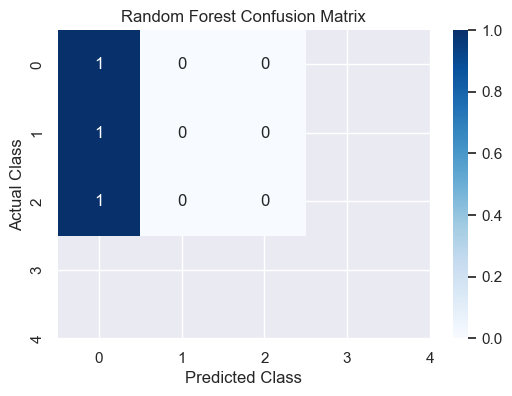

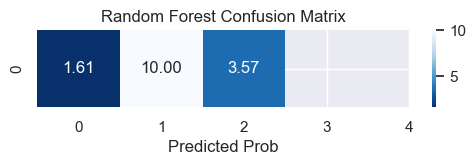

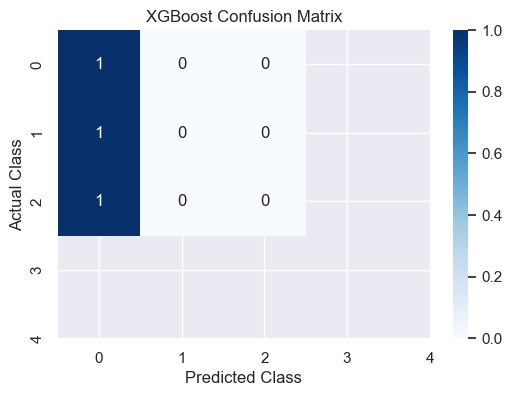

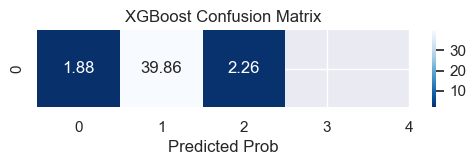

In [54]:
train_size = int(len(X) * 0.9)

X_train, y_train = X.iloc[:train_size], y.iloc[:train_size]
X_test, y_test = X.iloc[train_size:], y.iloc[train_size:]
#results = {}
for name, model in models.items():
    # Define the pipeline
    model_pipeline = Pipeline([
        ("preprocessor", preprocessor),
        ("model", model)
    ])
    
    # Train the model
    model_pipeline.fit(X_train, y_train)
    
    # Predictions
    y_pred = model_pipeline.predict(X_test)
    pred= model_pipeline.predict_proba(df_home_frw)

    plt.figure(figsize=(6,4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel("Predicted Class")
    plt.ylabel("Actual Class")
    plt.title(f"{name} Confusion Matrix")
    plt.show()
    plt.figure(figsize=(6,1))
    sns.heatmap(1/pred, annot=True, fmt='.2f', cmap='Blues_r', xticklabels=labels)
    plt.xlabel("Predicted Prob")
    plt.ylabel("")
    plt.title(f"{name} Confusion Matrix")
    plt.show()
    # Evaluate performance
    

### Model vs Home

In [55]:
target = "GAC"  # Goals For

# Separate features and target
X = df_home_ga.drop(columns=[target])
y = df_home_ga[target]
categorical_features = ["H/A"]  # Home/Away column
numerical_features = X.select_dtypes(include=[np.number]).columns.tolist()


In [56]:
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numerical_features),
    ("cat", OneHotEncoder(drop="first"), categorical_features)
])

In [57]:
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=5, class_weight='balanced', random_state=42),
    "XGBoost": XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, objective='multi:softmax', 
                             num_class=6, eval_metric='mlogloss', random_state=42),
   # "LightGBM": LGBMRegressor(n_estimators=100, random_state=42),
   # "Linear Regression": LinearRegression()
}

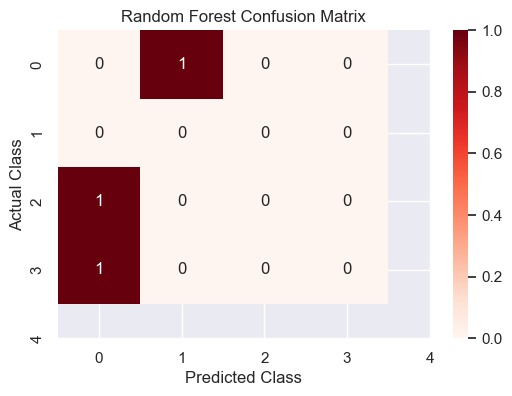

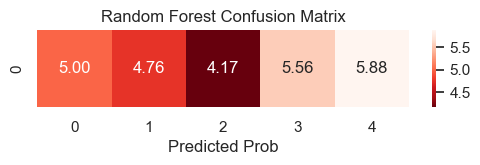

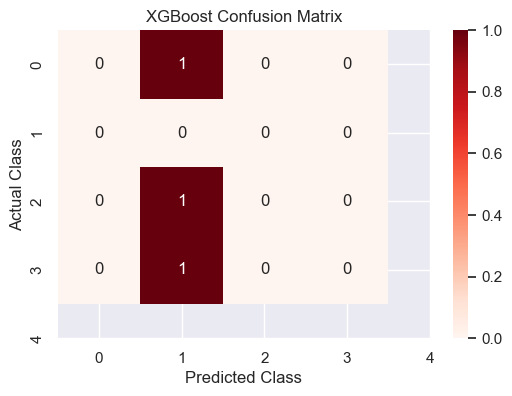

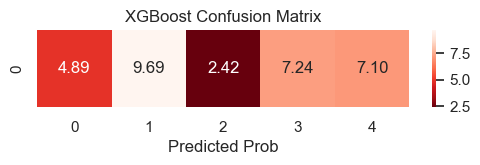

In [58]:
train_size = int(len(X) * 0.9)

X_train, y_train = X.iloc[:train_size], y.iloc[:train_size]
X_test, y_test = X.iloc[train_size:], y.iloc[train_size:]
#results = {}
for name, model in models.items():
    # Define the pipeline
    model_pipeline = Pipeline([
        ("preprocessor", preprocessor),
        ("model", model)
    ])
    
    # Train the model
    model_pipeline.fit(X_train, y_train)
    
    # Predictions
    y_pred = model_pipeline.predict(X_test)
    pred= model_pipeline.predict_proba(df_home_bcw)

    plt.figure(figsize=(6,4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Reds', xticklabels=labels, yticklabels=labels)
    plt.xlabel("Predicted Class")
    plt.ylabel("Actual Class")
    plt.title(f"{name} Confusion Matrix")
    plt.show()
    plt.figure(figsize=(6,1))
    sns.heatmap(1/pred, annot=True, fmt='.2f', cmap='Reds_r', xticklabels=labels)
    plt.xlabel("Predicted Prob")
    plt.ylabel("")
    plt.title(f"{name} Confusion Matrix")
    plt.show()
    # Evaluate performance
    

### Model Away

In [59]:
target = "GFC"  # Goals For

# Separate features and target
X = df_away_gf.drop(columns=[target])
y = df_away_gf[target]
categorical_features = ["H/A"]  # Home/Away column
numerical_features = X.select_dtypes(include=[np.number]).columns.tolist()


In [60]:
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numerical_features),
    ("cat", OneHotEncoder(drop="first"), categorical_features)
])

In [61]:
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=5, class_weight='balanced', random_state=42),
    "XGBoost": XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, objective='multi:softmax', 
                             num_class=6, eval_metric='mlogloss', random_state=42),
   # "LightGBM": LGBMRegressor(n_estimators=100, random_state=42),
   # "Linear Regression": LinearRegression()
}

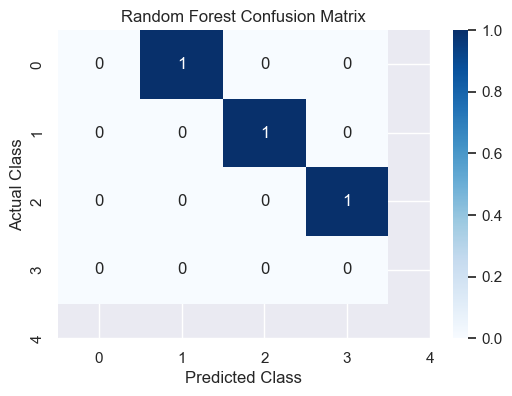

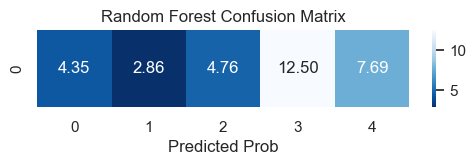

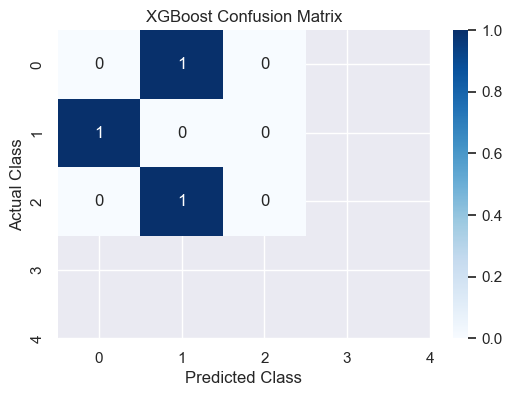

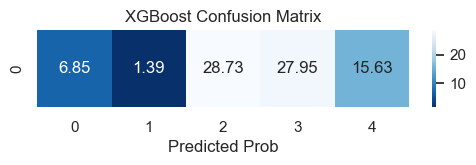

In [62]:
train_size = int(len(X) * 0.9)

X_train, y_train = X.iloc[:train_size], y.iloc[:train_size]
X_test, y_test = X.iloc[train_size:], y.iloc[train_size:]
#results = {}
for name, model in models.items():
    # Define the pipeline
    model_pipeline = Pipeline([
        ("preprocessor", preprocessor),
        ("model", model)
    ])
    
    # Train the model
    model_pipeline.fit(X_train, y_train)
    
    # Predictions
    y_pred = model_pipeline.predict(X_test)
    pred= model_pipeline.predict_proba(df_away_frw)

    plt.figure(figsize=(6,4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel("Predicted Class")
    plt.ylabel("Actual Class")
    plt.title(f"{name} Confusion Matrix")
    plt.show()
    plt.figure(figsize=(6,1))
    sns.heatmap(1/pred, annot=True, fmt='.2f', cmap='Blues_r', xticklabels=labels)
    plt.xlabel("Predicted Prob")
    plt.ylabel("")
    plt.title(f"{name} Confusion Matrix")
    plt.show()
    # Evaluate performance
    

### Model vs Away

In [63]:
target = "GAC"  # Goals For

# Separate features and target
X = df_away_ga.drop(columns=[target])
y = df_away_ga[target]
categorical_features = ["H/A"]  # Home/Away column
numerical_features = X.select_dtypes(include=[np.number]).columns.tolist()


In [64]:
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numerical_features),
    ("cat", OneHotEncoder(drop="first"), categorical_features)
])

In [65]:
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=5, class_weight='balanced', random_state=42),
    "XGBoost": XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, objective='multi:softmax', 
                             num_class=6, eval_metric='mlogloss', random_state=42),
   # "LightGBM": LGBMRegressor(n_estimators=100, random_state=42),
   # "Linear Regression": LinearRegression()
}

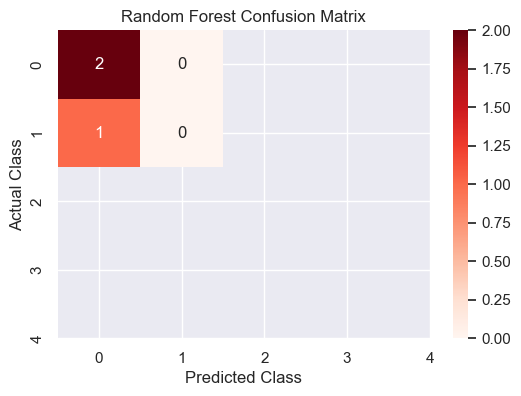

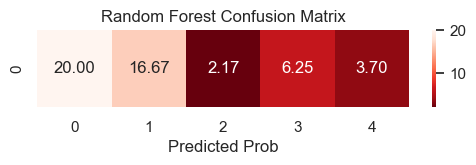

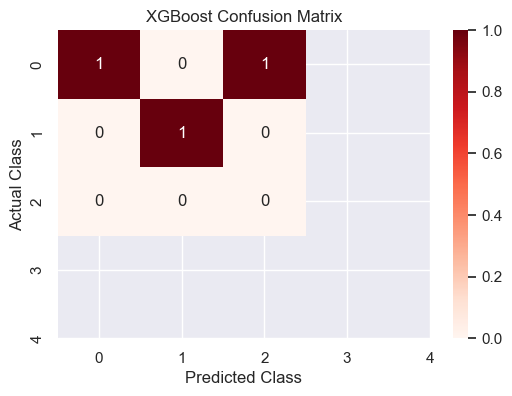

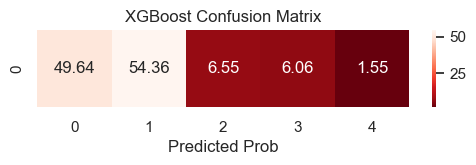

In [66]:
train_size = int(len(X) * 0.9)

X_train, y_train = X.iloc[:train_size], y.iloc[:train_size]
X_test, y_test = X.iloc[train_size:], y.iloc[train_size:]
#results = {}
for name, model in models.items():
    # Define the pipeline
    model_pipeline = Pipeline([
        ("preprocessor", preprocessor),
        ("model", model)
    ])
    
    # Train the model
    model_pipeline.fit(X_train, y_train)
    
    # Predictions
    y_pred = model_pipeline.predict(X_test)
    pred= model_pipeline.predict_proba(df_away_bcw)

    plt.figure(figsize=(6,4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Reds', xticklabels=labels, yticklabels=labels)
    plt.xlabel("Predicted Class")
    plt.ylabel("Actual Class")
    plt.title(f"{name} Confusion Matrix")
    plt.show()
    plt.figure(figsize=(6,1))
    sns.heatmap(1/pred, annot=True, fmt='.2f', cmap='Reds_r', xticklabels=labels)
    plt.xlabel("Predicted Prob")
    plt.ylabel("")
    plt.title(f"{name} Confusion Matrix")
    plt.show()
    # Evaluate performance
    

## Regression

### Model Home

In [67]:
target = "Tm_PTS"  # Goals For

# Separate features and target
X = df_home_gf.drop(columns=[target])
y = df_home_gf[target]
categorical_features = ["H/A"]  # Home/Away column
numerical_features = X.select_dtypes(include=[np.number]).columns.tolist()


In [68]:
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numerical_features),
    ("cat", OneHotEncoder(drop="first"), categorical_features)
])

In [69]:
model_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("model", RandomForestRegressor(n_estimators=20, random_state=25))
])

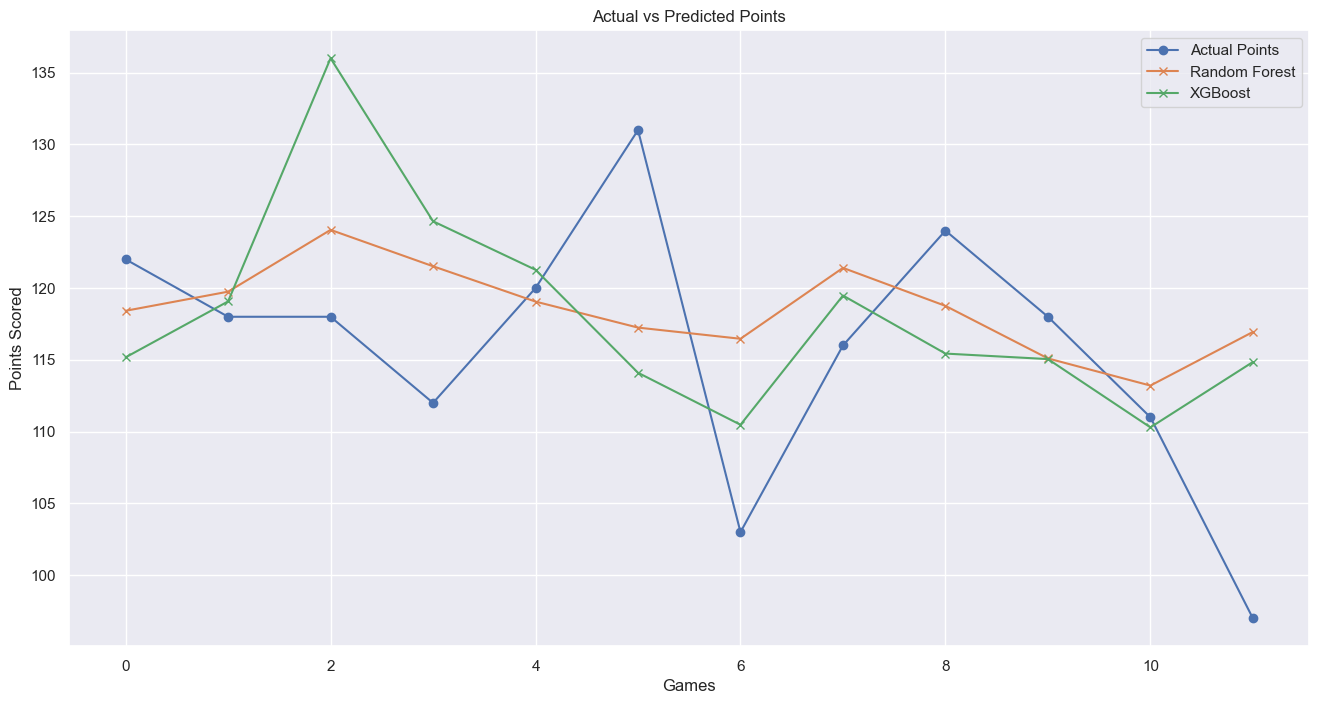

In [85]:
models = {
    "Random Forest": RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42),
   # "LightGBM": LGBMRegressor(n_estimators=100, random_state=42),
   # "Linear Regression": LinearRegression()
}

# Split into training and testing sets
train_size = int(len(X) * 0.8)

X_train, y_train = X.iloc[:train_size], y.iloc[:train_size]
X_test, y_test = X.iloc[train_size:], y.iloc[train_size:]
# Train and evaluate each model
results = {}
plt.figure(figsize=(16,8))
plt.plot(y_test.values, label='Actual Points', marker='o')
for name, model in models.items():
    # Define the pipeline
    model_pipeline = Pipeline([
        ("preprocessor", preprocessor),
        ("model", model)
    ])
    
    # Train the model
    model_pipeline.fit(X_train, y_train)
    
    # Predictions
    y_pred = model_pipeline.predict(X_test)
    plt.plot(y_pred, label=name, marker='x')
    
    # Evaluate performance
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    pred= model_pipeline.predict(df_home_frw)
    
    results[name] = {"MAE": mae, "RMSE": rmse, "PRED": pred[0]}

# Convert results to a DataFrame and display
results_df = pd.DataFrame(results).T
plt.legend()
plt.title("Actual vs Predicted Points")
plt.xlabel("Games")
plt.ylabel("Points Scored")
plt.show()

In [80]:
results_df

,MAE,RMSE,PRED
Random Forest,7.063876,9.047376,117.443289
XGBoost,8.145854,10.362132,118.500099


### Model vs Home

In [48]:
target = "Opp_PTS"  # Goals For

# Separate features and target
X = df_home_ga.drop(columns=[target])
y = df_home_ga[target]
categorical_features = ["H/A"]  # Home/Away column
numerical_features = X.select_dtypes(include=[np.number]).columns.tolist()


In [49]:
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numerical_features),
    ("cat", OneHotEncoder(drop="first"), categorical_features)
])

In [50]:
model_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("model", RandomForestRegressor(n_estimators=20, random_state=25))
])

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=25)

# Train the model
model_pipeline.fit(X_train, y_train)

# Predictions
y_pred = model_pipeline.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"MAE: {mae:.3f}")
print(f"RMSE: {rmse:.3f}")


MAE: 13.425
RMSE: 14.329


In [52]:
models = {
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42),
    "LightGBM": LGBMRegressor(n_estimators=100, random_state=42),
    "Linear Regression": LinearRegression()
}

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=25)

# Train and evaluate each model
results = {}
for name, model in models.items():
    # Define the pipeline
    model_pipeline = Pipeline([
        ("preprocessor", preprocessor),
        ("model", model)
    ])
    
    # Train the model
    model_pipeline.fit(X_train, y_train)
    
    # Predictions
    y_pred = model_pipeline.predict(X_test)
    
    # Evaluate performance
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    pred= model_pipeline.predict(df_home_bcw)
    
    results[name] = {"MAE": mae, "RMSE": rmse, "PRED": pred}

# Convert results to a DataFrame and display
results_df = pd.DataFrame(results).T

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000991 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6818
[LightGBM] [Info] Number of data points in the train set: 52, number of used features: 405
[LightGBM] [Info] Start training from score 108.211538
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

In [53]:
results_df

,MAE,RMSE,PRED
Random Forest,13.041667,13.840622,[108.75]
XGBoost,13.151134,15.03493,[113.32865]
LightGBM,16.852781,18.445559,[102.71760442340414]
Linear Regression,24.528301,25.202121,[84.73789959470245]


### Model Away

In [54]:
target = "Tm_PTS"  # Goals For

# Separate features and target
X = df_away_gf.drop(columns=[target])
y = df_away_gf[target]
categorical_features = ["H/A"]  # Home/Away column
numerical_features = X.select_dtypes(include=[np.number]).columns.tolist()


In [55]:
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numerical_features),
    ("cat", OneHotEncoder(drop="first"), categorical_features)
])

In [57]:
model_pipeline2 = Pipeline([
    ("preprocessor", preprocessor),
    ("model", RandomForestRegressor(n_estimators=20, random_state=25))
])

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=25)

# Train the model
model_pipeline2.fit(X_train, y_train)

# Predictions
y_pred = model_pipeline2.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"MAE: {mae:.3f}")
print(f"RMSE: {rmse:.3f}")


MAE: 12.708
RMSE: 14.490


In [59]:
models = {
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42),
    "LightGBM": LGBMRegressor(n_estimators=100, random_state=42),
    "Linear Regression": LinearRegression()
}

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=25)

# Train and evaluate each model
results = {}
for name, model in models.items():
    # Define the pipeline
    model_pipeline = Pipeline([
        ("preprocessor", preprocessor),
        ("model", model)
    ])
    
    # Train the model
    model_pipeline.fit(X_train, y_train)
    
    # Predictions
    y_pred = model_pipeline.predict(X_test)
    
    # Evaluate performance
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    pred= model_pipeline.predict(df_away_frw)
    
    results[name] = {"MAE": mae, "RMSE": rmse, "PRED": pred}

# Convert results to a DataFrame and display
results_df = pd.DataFrame(results).T

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000461 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6654
[LightGBM] [Info] Number of data points in the train set: 51, number of used features: 405
[LightGBM] [Info] Start training from score 121.941176
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

In [60]:
results_df

,MAE,RMSE,PRED
Random Forest,14.915,16.475376,[120.74]
XGBoost,12.521159,13.834184,[121.489395]
LightGBM,13.837515,17.031631,[126.221659266553]
Linear Regression,14.006226,16.370987,[137.60611314295068]


### Model vs Away

In [61]:
target = "Opp_PTS"  # Goals For

# Separate features and target
X = df_away_ga.drop(columns=[target])
y = df_away_ga[target]
categorical_features = ["H/A"]  # Home/Away column
numerical_features = X.select_dtypes(include=[np.number]).columns.tolist()


In [62]:
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numerical_features),
    ("cat", OneHotEncoder(drop="first"), categorical_features)
])

In [63]:
model_pipeline2 = Pipeline([
    ("preprocessor", preprocessor),
    ("model", RandomForestRegressor(n_estimators=20, random_state=25))
])

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=25)

# Train the model
model_pipeline2.fit(X_train, y_train)

# Predictions
y_pred = model_pipeline2.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"MAE: {mae:.3f}")
print(f"RMSE: {rmse:.3f}")


MAE: 10.350
RMSE: 11.309


In [65]:
models = {
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42),
    "LightGBM": LGBMRegressor(n_estimators=100, random_state=42),
    "Linear Regression": LinearRegression()
}

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=25)

# Train and evaluate each model
results = {}
for name, model in models.items():
    # Define the pipeline
    model_pipeline = Pipeline([
        ("preprocessor", preprocessor),
        ("model", model)
    ])
    
    # Train the model
    model_pipeline.fit(X_train, y_train)
    
    # Predictions
    y_pred = model_pipeline.predict(X_test)
    
    # Evaluate performance
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    pred= model_pipeline.predict(df_away_bcw)
    
    results[name] = {"MAE": mae, "RMSE": rmse, "PRED": pred}

# Convert results to a DataFrame and display
results_df = pd.DataFrame(results).T

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000408 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6692
[LightGBM] [Info] Number of data points in the train set: 51, number of used features: 405
[LightGBM] [Info] Start training from score 110.666667
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

In [66]:
results_df

,MAE,RMSE,PRED
Random Forest,11.596667,12.906048,[108.99]
XGBoost,15.120514,16.820382,[102.5551]
LightGBM,9.838286,11.897321,[109.56588285586935]
Linear Regression,14.973625,19.146221,[86.82162740707135]
